# Load the libraries    

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



# Load the data      

In [2]:
df_titanic  = pd.read_csv('./train.csv')

# EDA

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
idsUnique = len(set(df_titanic.PassengerId))
idsTotal = df_titanic.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate PassengerId for " + str(idsTotal) + " total entries")

There are 0 duplicate PassengerId for 891 total entries


In [8]:
idsUnique = len(set(df_titanic.Ticket))
idsTotal = df_titanic.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate Ticket for " + str(idsTotal) + " total entries")

There are 210 duplicate Ticket for 891 total entries


In [9]:
df_titanic.shape

(891, 12)

In [10]:
df_titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df_titanic["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [12]:
df_titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

# Preprocessing  

In [13]:
# we drop some columsn as they dont contribute much
# ticket and Name dont contribute as those are just ids 
data = df_titanic.drop(columns=["Name","Ticket" ])
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [14]:
# impute the age

imputer_cols = ["Age"]
imputer = SimpleImputer(strategy="median" )
imputer.fit(data[imputer_cols])
data[imputer_cols] = imputer.transform(data[imputer_cols])
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,28.0,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [15]:
data.isnull().sum().sort_values(ascending=False)


Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [16]:
data = data.drop(columns=["Cabin","PassengerId" ])

data.dropna(inplace=True)
data.isnull().sum().sort_values(ascending=False)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
# label_cols = ["Embarked","Sex"]
# for col in data.columns:
#         data[col] = data[col].astype(str)
#         data[col] = LabelEncoder().fit_transform(data[col])

data=data.join(pd.get_dummies(data["Sex"], prefix = "Sex_",drop_first=True))
data.drop(columns=["Sex"],inplace=True)
data=data.join(pd.get_dummies(data["Embarked"], prefix = "Embarked"))
data.drop(columns=["Embarked"],inplace=True)
data
       

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


            Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived    1.000000 -0.335549 -0.069822 -0.034040  0.083151  0.255290   
Pclass     -0.335549  1.000000 -0.336512  0.081656  0.016824 -0.548193   
Age        -0.069822 -0.336512  1.000000 -0.232543 -0.171485  0.093707   
SibSp      -0.034040  0.081656 -0.232543  1.000000  0.414542  0.160887   
Parch       0.083151  0.016824 -0.171485  0.414542  1.000000  0.217532   
Fare        0.255290 -0.548193  0.093707  0.160887  0.217532  1.000000   
Sex__male  -0.541585  0.127741  0.086506 -0.116348 -0.247508 -0.179958   
Embarked_C  0.169966 -0.245733  0.032098 -0.060074 -0.011588  0.270731   
Embarked_Q  0.004536  0.220558 -0.030436 -0.026692 -0.081585 -0.116684   
Embarked_S -0.151777  0.076466 -0.008964  0.069438  0.061512 -0.163758   

            Sex__male  Embarked_C  Embarked_Q  Embarked_S  
Survived    -0.541585    0.169966    0.004536   -0.151777  
Pclass       0.127741   -0.245733    0.220558    0.076466  
Age  

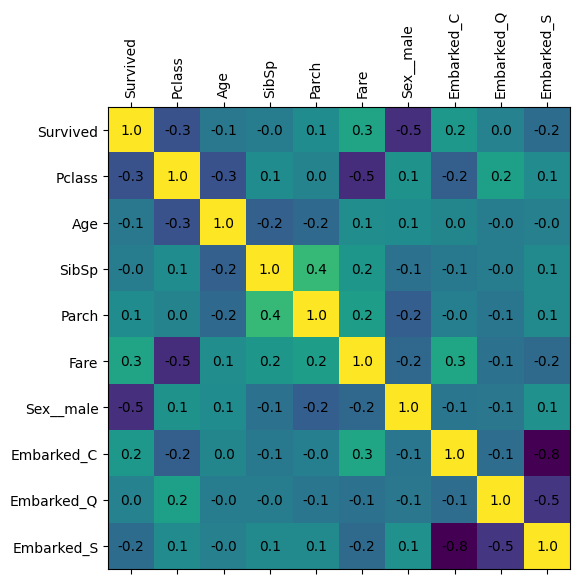

In [18]:
# correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(corr_matrix)
for (i, j), z in np.ndenumerate(corr_matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


- The Survived variable has a positive correlation with Fare (0.255) and Embarked_C (0.17), which means that passengers who paid higher fares and embarked from port C have a higher chance of survival.
- The Survived variable has a negative correlation with Pclass (-0.336) and Sex__male (-0.542), which means that passengers with higher class and females have a higher chance of survival.
- Age has a weak negative correlation with Survived (-0.07), which means that older passengers have a slightly lower chance of survival.
- SibSp and Parch have weak correlations with Survived (-0.034 and 0.083, respectively), which means that passengers with more siblings/spouses or parents/children onboard did not significantly affect their survival rate.
- Pclass has a strong negative correlation with Fare (-0.548), which means that passengers in higher classes paid higher fares.
- Sex__male has a negative correlation with Embarked_S (0.121), which means that more males embarked from port S.
- Embarked_C and Embarked_Q have negative correlations with Embarked_S (-0.783 and -0.499, respectively), which means that most passengers embarked from port S.

In [19]:
train_set ,test_set = train_test_split(data,test_size=0.2,random_state=42)

In [20]:
print(train_set.shape)
print(test_set.shape)


(711, 10)
(178, 10)


In [21]:
temp = train_set["Survived"]
train_set.drop(columns=["Survived"],inplace=True)
train_set=train_set.join(temp)
train_set

,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked_C,Embarked_Q,Embarked_S,Survived
708,1,22.0,0,0,151.5500,0,0,0,1,1
240,3,28.0,1,0,14.4542,0,1,0,0,0
382,3,32.0,0,0,7.9250,1,0,0,1,0
792,3,28.0,8,2,69.5500,0,0,0,1,0
683,3,14.0,5,2,46.9000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
107,3,28.0,0,0,7.7750,1,0,0,1,1
271,3,25.0,0,0,0.0000,1,0,0,1,1
862,1,48.0,0,0,25.9292,0,0,0,1,1
436,3,21.0,2,2,34.3750,0,0,0,1,0


In [22]:
temp = test_set["Survived"]
test_set.drop(columns=["Survived"],inplace=True)
test_set=test_set.join(temp)
test_set

,Pclass,Age,SibSp,Parch,Fare,Sex__male,Embarked_C,Embarked_Q,Embarked_S,Survived
281,3,28.0,0,0,7.8542,1,0,0,1,0
435,1,14.0,1,2,120.0000,0,0,0,1,1
39,3,14.0,1,0,11.2417,0,1,0,0,1
418,2,30.0,0,0,13.0000,1,0,0,1,0
585,1,18.0,0,2,79.6500,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,1,0,0,1,0
807,3,18.0,0,0,7.7750,0,0,0,1,0
25,3,38.0,1,5,31.3875,0,0,0,1,1
85,3,33.0,3,0,15.8500,0,0,0,1,1


# Decision Tree

## the actual model 

In [23]:
# Create Split
## Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

## Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    ## count all samples at split point.
    n_instances = float(sum([len(group) for group in groups]))
    ## sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        ## score (probability) the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        ## weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

## Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}


In [24]:
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)
  
# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

In [25]:
def decision_tree(train, test, max_depth, min_size):
	tree = build_tree(train, max_depth, min_size)
	predictions = list()
	for row in test:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)
        

## model evaluation 

In [26]:
# evaluate algorithm
max_depth = 5
min_size = 10
predicted = decision_tree(train_set.values,test_set.values, max_depth, min_size)
actual = test_set["Survived"].values


In [27]:
# Calculate confusion matrix
cm = confusion_matrix(actual, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(actual, predicted)

# Calculate accuracy score
accuracy = accuracy_score(actual, predicted)

print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(report)
print("\nAccuracy score:", accuracy)

Confusion matrix:
[[95 14]
 [18 51]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.78      0.74      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Accuracy score: 0.8202247191011236


In [28]:
# lets do grid search to maximise this

# Define the parameter grid
param_grid = {
    'max_depth': [3,5,9,15],
    'min_size': [2,5,10,15,20],
    
}

# Define a custom function to train and evaluate the model
paramList=[]



def train_and_evaluate_model(params,i):
    # Instantiate the model with the given params
    predicted  = decision_tree(train_set.values,test_set.values,**params)
    actual = test_set.values[:, -1]
    accuracy = accuracy_score(actual, predicted)
    print(f"model {i} with params :",params,"got accuracy ", accuracy)
    # Store the model and its results in the modelList
    paramList.append((params, accuracy))
    print("model trained and scored !")
    

# Generate all combinations of parameters
param_list = list(ParameterGrid(param_grid))

print("A total of ",len(param_list)," models will be trained and scored ")
# Evaluate each combination of parameters
i=1
for params in param_list:
    train_and_evaluate_model(params,i)
    i+=1

A total of  20  models will be trained and scored 
model 1 with params : {'max_depth': 3, 'min_size': 2} got accuracy  0.8202247191011236
model trained and scored !
model 2 with params : {'max_depth': 3, 'min_size': 5} got accuracy  0.8202247191011236
model trained and scored !
model 3 with params : {'max_depth': 3, 'min_size': 10} got accuracy  0.8202247191011236
model trained and scored !
model 4 with params : {'max_depth': 3, 'min_size': 15} got accuracy  0.8202247191011236
model trained and scored !
model 5 with params : {'max_depth': 3, 'min_size': 20} got accuracy  0.8202247191011236
model trained and scored !
model 6 with params : {'max_depth': 5, 'min_size': 2} got accuracy  0.8202247191011236
model trained and scored !
model 7 with params : {'max_depth': 5, 'min_size': 5} got accuracy  0.8202247191011236
model trained and scored !
model 8 with params : {'max_depth': 5, 'min_size': 10} got accuracy  0.8202247191011236
model trained and scored !
model 9 with params : {'max_depth

In [29]:
print(paramList)

[({'max_depth': 3, 'min_size': 2}, 0.8202247191011236), ({'max_depth': 3, 'min_size': 5}, 0.8202247191011236), ({'max_depth': 3, 'min_size': 10}, 0.8202247191011236), ({'max_depth': 3, 'min_size': 15}, 0.8202247191011236), ({'max_depth': 3, 'min_size': 20}, 0.8202247191011236), ({'max_depth': 5, 'min_size': 2}, 0.8202247191011236), ({'max_depth': 5, 'min_size': 5}, 0.8202247191011236), ({'max_depth': 5, 'min_size': 10}, 0.8202247191011236), ({'max_depth': 5, 'min_size': 15}, 0.8202247191011236), ({'max_depth': 5, 'min_size': 20}, 0.8202247191011236), ({'max_depth': 9, 'min_size': 2}, 0.8033707865168539), ({'max_depth': 9, 'min_size': 5}, 0.8033707865168539), ({'max_depth': 9, 'min_size': 10}, 0.8089887640449438), ({'max_depth': 9, 'min_size': 15}, 0.8089887640449438), ({'max_depth': 9, 'min_size': 20}, 0.8089887640449438), ({'max_depth': 15, 'min_size': 2}, 0.7584269662921348), ({'max_depth': 15, 'min_size': 5}, 0.7584269662921348), ({'max_depth': 15, 'min_size': 10}, 0.769662921348314

## final result 

In [30]:
paramList.sort(key=lambda x: x[1], reverse=True)
best_params = paramList[0]
print(best_params)

({'max_depth': 3, 'min_size': 2}, 0.8202247191011236)


In [31]:

predicted  = decision_tree(train_set.values,test_set.values,**best_params[0])
actual = test_set.values[:, -1]

# Calculate confusion matrix
cm = confusion_matrix(actual, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(actual, predicted)

# Calculate accuracy score
accuracy = accuracy_score(actual, predicted)

print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(report)
print("\nAccuracy score:", accuracy)


Confusion matrix:
[[92 17]
 [15 54]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       109
         1.0       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Accuracy score: 0.8202247191011236


the decision tree model accuracy significantly improved in terms of complexity while keeping the model accuracy almost the same at 0.82

initially the tree had a depth of 5 and a min size of 10 with an accuracy of 0.82 and after tuning them we finally landed  with a 'max_depth': 3, 'min_size': 2 i.e minimum number of samples required to split a node further was reduced along with the depth which resulted in a more simpler and efficient tree.

this also reduce the memory footprint of the decision tree model, as it requires fewer nodes and leaves to store the tree structure.


# ADABoost

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, M,max_depth=1,min_samples_leaf=1):
        self.M = M
        self.alpha = np.zeros(self.M)
        self.models = []
        self.errors=[]
        self.weights=[]
        self.max_depth= max_depth if max_depth!=None else 1
        self.min_samples_leaf= min_samples_leaf if min_samples_leaf!=None else 1
        
    def fit(self, X, y):
        n = X.shape[0]
        w = np.full(n, 1/n)
        
        for m in range(self.M):
            self.weights.append(w)
            h = DecisionTreeClassifier(max_depth=self.max_depth,min_samples_leaf=self.min_samples_leaf)
            # h = DecisionTreeClassifier(max_depth=1)
            h.fit(X, y, sample_weight=w)
            self.models.append(h)
            
            y_pred = self.predict(X)
            error = self.compute_error(y, y_pred, w)
            self.errors.append(error)
            self.alpha[m] = self.compute_alpha(error)
            w = self.update_weights(w, self.alpha[m],y, y_pred)
            
    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for alpha, h in zip(self.alpha, self.models):
            predictions += alpha * h.predict(X)
        return np.sign(predictions)
    
    def compute_error(self, y, y_pred, w):
        return np.sum(w * (y_pred != y))
    
    def compute_alpha(self, error):
        return 0.5 * np.log((1 - error) / error)
    
    def update_weights(self, w, alpha,y, y_pred):
        return w * np.exp(-alpha * y * y_pred)


In [33]:
import matplotlib.pyplot as plt

# create data
X_train,y_train, = train_set.drop(columns=["Survived"]).values,train_set["Survived"].values
X_test, y_test = test_set.drop(columns=["Survived"]).values,test_set["Survived"].values
# initialize AdaBoost model
# params={
#     'max_depth':best_params[0]["max_depth"],
#     'min_samples_leaf':best_params[0]["min_size"]
# }
M = 500
model = AdaBoost(M)

# train model and compute train/test errors

test_errors = np.zeros(M)
model.fit(X_train, y_train)

for m in range(M):
    test_errors[m]=1-accuracy_score(model.models[m].predict(X_test),y_test)


train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
test_actual = test_set["Survived"].values
accuracy_test = accuracy_score(test_actual, test_pred)
train_actual = train_set["Survived"].values
accuracy_train = accuracy_score(train_actual, train_pred)


# Calculate confusion matrix
cm = confusion_matrix(actual, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(actual, predicted)


print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(report)
print("\nAccuracy score Test:", accuracy_test)
print("\nAccuracy score Train:", accuracy_train)



Confusion matrix:
[[92 17]
 [15 54]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       109
         1.0       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Accuracy score Test: 0.797752808988764

Accuracy score Train: 0.7834036568213784


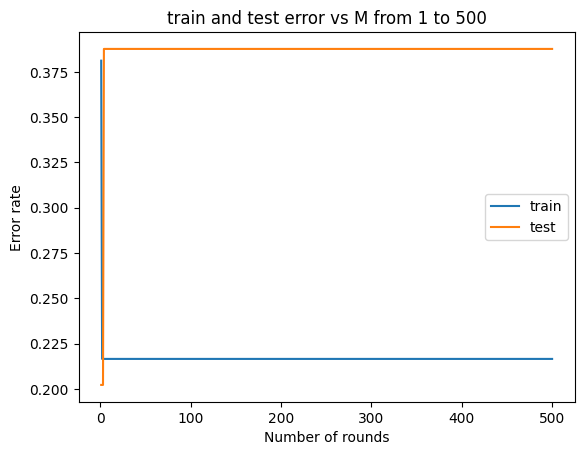

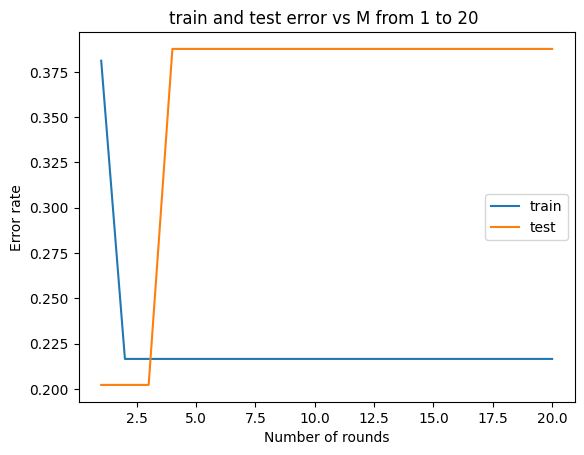

In [34]:
# plot errors
plt.plot(range(1, M+1), model.errors, label='train')
plt.plot(range(1, M+1), test_errors, label='test')
plt.xlabel('Number of rounds')
plt.ylabel('Error rate')
plt.legend()
plt.title("train and test error vs M from 1 to 500")
plt.show()

samples = 20
plt.plot(range(1, samples+1), model.errors[:samples], label='train')
plt.plot(range(1, samples+1), test_errors[:samples], label='test')
plt.xlabel('Number of rounds')
plt.ylabel('Error rate')
plt.legend()
plt.title("train and test error vs M from 1 to 20 ")
plt.show()

In [35]:
# lets do gridsearch to maximise accuracy 
# create data
X_train,y_train, = train_set.drop(columns=["Survived"]).values,train_set["Survived"].values
X_test, y_test = test_set.drop(columns=["Survived"]).values,test_set["Survived"].values

# Define the parameter grid
param_grid = {
    'M':[100,200,300,400,500],
    'max_depth': [3,5,9,15],
    'min_samples_leaf': [2,5,10,15,20],
}

# Define a custom function to train and evaluate the model
paramList=[]



def train_and_evaluate_model(params,i):
    # Instantiate the model with the given params
    model  = AdaBoost(**params)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    actual =  test_set["Survived"].values
    accuracy = accuracy_score(actual, predicted)
    print(f"model {i} with params :",params,"got test accuracy ", accuracy)
    # Store the model and its results in the modelList
    paramList.append((model,params, accuracy))
    print("model trained and scored !")
    

# Generate all combinations of parameters
param_list = list(ParameterGrid(param_grid))

print("A total of ",len(param_list)," models will be trained and scored ")
# Evaluate each combination of parameters
i=1
for params in param_list:
    train_and_evaluate_model(params,i)
    i+=1

A total of  100  models will be trained and scored 
model 1 with params : {'M': 100, 'max_depth': 3, 'min_samples_leaf': 2} got test accuracy  0.7696629213483146
model trained and scored !
model 2 with params : {'M': 100, 'max_depth': 3, 'min_samples_leaf': 5} got test accuracy  0.7752808988764045
model trained and scored !
model 3 with params : {'M': 100, 'max_depth': 3, 'min_samples_leaf': 10} got test accuracy  0.7752808988764045
model trained and scored !
model 4 with params : {'M': 100, 'max_depth': 3, 'min_samples_leaf': 15} got test accuracy  0.7471910112359551
model trained and scored !
model 5 with params : {'M': 100, 'max_depth': 3, 'min_samples_leaf': 20} got test accuracy  0.7696629213483146
model trained and scored !
model 6 with params : {'M': 100, 'max_depth': 5, 'min_samples_leaf': 2} got test accuracy  0.7471910112359551
model trained and scored !
model 7 with params : {'M': 100, 'max_depth': 5, 'min_samples_leaf': 5} got test accuracy  0.7415730337078652
model trained

In [36]:
paramList.sort(key=lambda x: x[2], reverse=True)
best_model = paramList[0]
print(best_model)

(<__main__.AdaBoost object at 0x0000022DE221E500>, {'M': 100, 'max_depth': 5, 'min_samples_leaf': 10}, 0.797752808988764)


Confusion matrix:
[[92 17]
 [15 54]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       109
         1.0       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178


Accuracy score Test: 0.797752808988764

Accuracy score Train: 0.8734177215189873


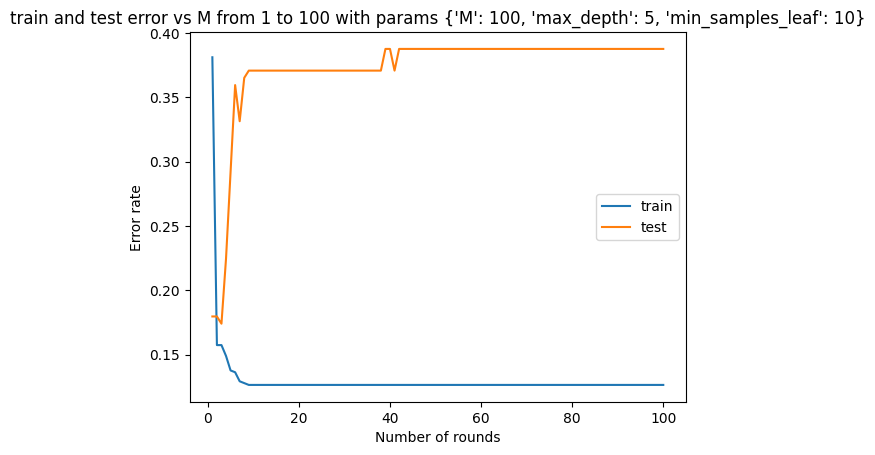

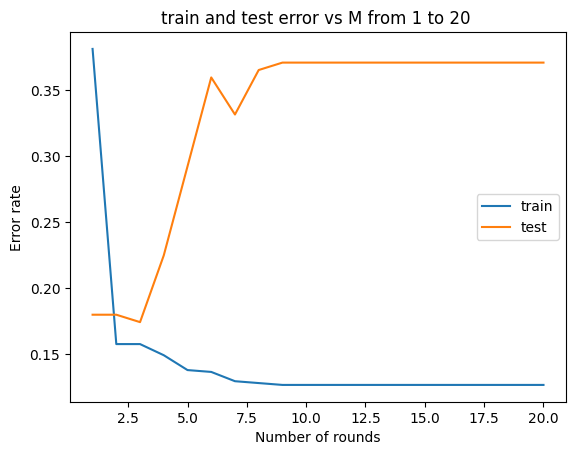

In [38]:
model  = AdaBoost(**best_model[1])
model.fit(X_train,y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
test_actual = test_set["Survived"].values
accuracy_test = accuracy_score(test_actual, test_pred)
train_actual = train_set["Survived"].values
accuracy_train = accuracy_score(train_actual, train_pred)


# Calculate confusion matrix
cm = confusion_matrix(actual, predicted)

# Calculate precision, recall, and F1-score
report = classification_report(actual, predicted)


print("Confusion matrix:")
print(cm)
print("\nClassification report:")
print(report)
print("\nAccuracy score Test:", accuracy_test)
print("\nAccuracy score Train:", accuracy_train)

test_errors=np.zeros(best_model[1]['M'])
for m in range(best_model[1]['M']):
    test_errors[m]=1-accuracy_score(model.models[m].predict(X_test),y_test)


# plot errors
plt.plot(range(1, best_model[1]['M']+1), model.errors, label='train')
plt.plot(range(1, best_model[1]['M']+1), test_errors, label='test')
plt.xlabel('Number of rounds')
plt.ylabel('Error rate')
plt.legend()
plt.title(f'train and test error vs M from 1 to {best_model[1]["M"]} with params {best_model[1]}')
plt.show()

samples = 20
plt.plot(range(1, samples+1), model.errors[:samples], label='train')
plt.plot(range(1, samples+1), test_errors[:samples], label='test')
plt.xlabel('Number of rounds')
plt.ylabel('Error rate')
plt.legend()
plt.title("train and test error vs M from 1 to 20 ")
plt.show()

It seems that tuning the max_depth and min_samples_leaf hyperparameters did not have a significant effect on the performance of the AdaBoost model, as the accuracy and other evaluation metrics remained the same before and after tuning. However, the training accuracy increased from 0.78 to 0.87 after tuning, indicating that the model may have been overfitting to the training data before tuning.